# HW2 - Plotting with `matplotlib`

**Spring 2020 | Python for Neuroscientists**


This HW will focus on plotting with the `matplotlib` library. We will use the coronavirus data, which can be downloaded as a csv file from the following Johns Hopkins University website. The data is updated daily here:

https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

This data is simply cumulative confirmed cases for each country.

In [1]:
# pandas 
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns



## Load the csv file

Make sure that the csv file and the .ipynb are in the same directory

In [2]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv') # this is pandas function

This loads a table, or pandas "dataframe." We will use pandas to extract data from the table. We can look at the contents of the table:

In [3]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,299,349,367,423,444,484,521,555,607,665
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333,361,377,383,400,409,416,433,446,467
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,466,501,525,545,564,583,601,601,638,646
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,10,14,16,17,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,1,1,2,2,3,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,4,4,4,4,4,4,4,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,4,4,4,4,4,4,4,4


Let's look at the stats for Italy

In [4]:
df_italy = df[df['Country/Region'] == 'Italy'] # this is one way to select Italy from the dataframe
df_italy.head() # this displays the 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,124632,128948,132547,135586,139422,143626,147577,152271,156363,159516


In [5]:
df_italy1 = df_italy.set_index('Country/Region', drop = True) # set pandas dataframe index to country
df_italy2 = df_italy1.drop(columns=['Lat','Long','Province/State'])

data_italy = df_italy2.loc['Italy','2/20/20':'4/5/20'] # select dates through April 5, 2020

Note that it would be cleaner to write the following:
> `df_italy = df_italy.set_index('Country/Region', drop = True)`

> `df_italy = df_italy.drop(columns=['Lat','Long','Province/State'])`

> `data_italy = df_italy.loc['Italy','2/20/20':'4/5/20']`

# Part 1: Plot the Data from Italy

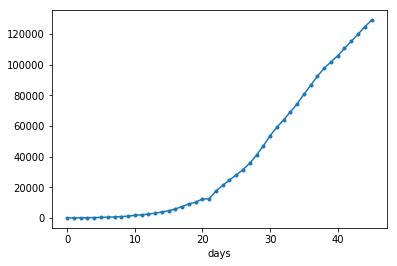

In [22]:
plt.plot(data_italy.values,'.-')
plt.xlabel('days')
plt.show()

## 1a Change the color of the line

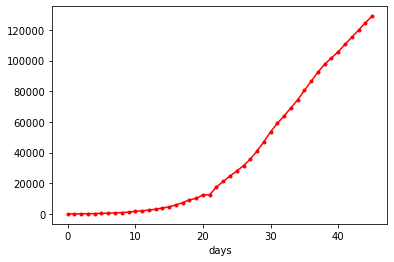

In [10]:
# your code here
plt.plot(data_italy.values,'.-',color='red')
plt.xlabel('days')
plt.show()

## 1b Change the thickness of the line

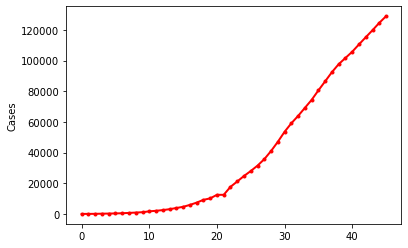

In [15]:
# your code here
plt.plot(data_italy.values,'.-',color='r',linewidth=2)
plt.ylabel('Cases')
plt.show()

## 1c Add a label the y-axis

In [ ]:
# your code here

## 1d Add a title

In [ ]:
# your code here

## 1e Resize the figure
Note that we can plot with the calendar date using `data_italy.index`

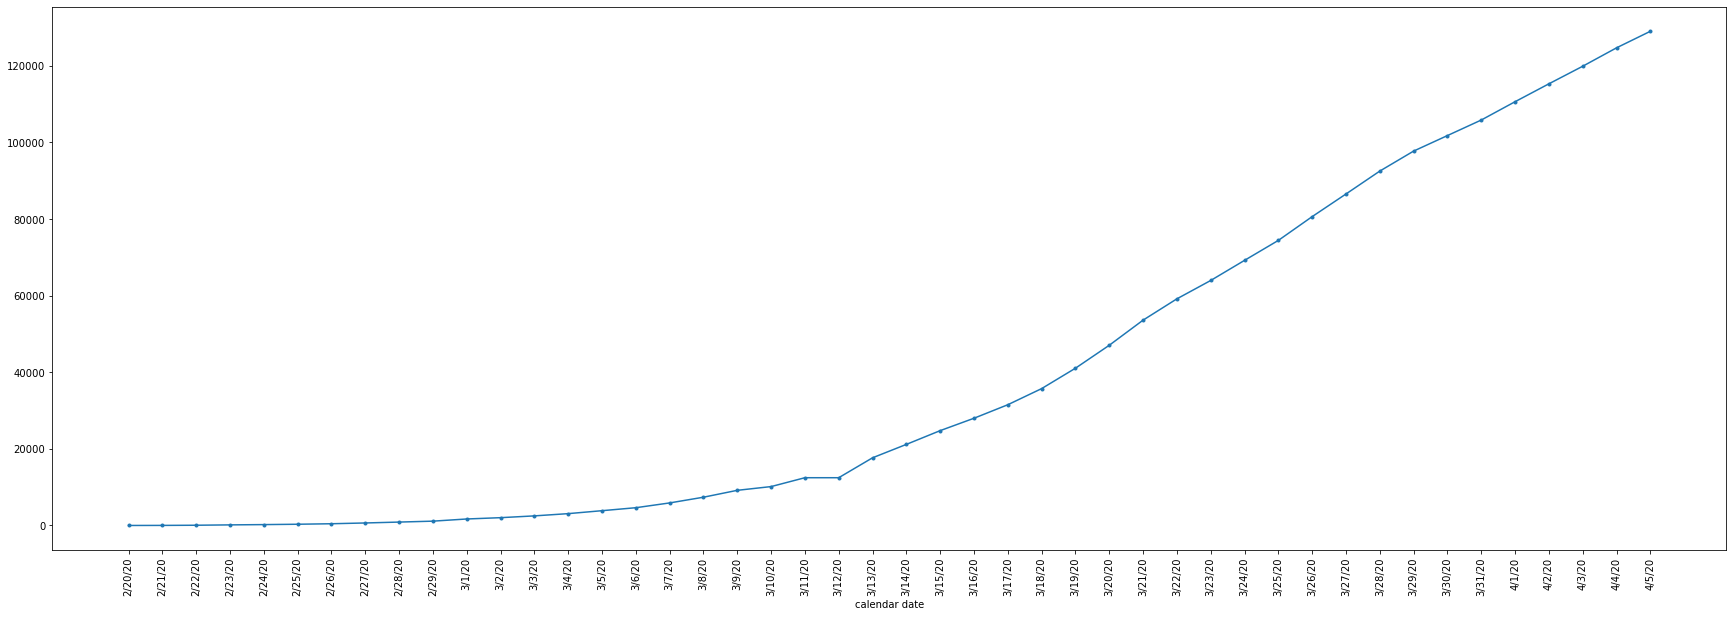

In [25]:

# resize this figure here

fig = plt.figure(figsize=(30,10))
plt.plot(data_italy.index,data_italy.values,'.-')
plt.xticks(rotation=90) # rotate the xticks so text is not so tight
plt.xlabel('calendar date')

plt.show()

## Part 2: Plotting US and Italy Data

We can extract the data for the US from the dataframe

In [26]:
df_us = df[df['Country/Region'] == 'US']
df_us = df_us.set_index('Country/Region', drop = True) # set pandas dataframe index to country
df_us = df_us.drop(columns=['Lat','Long','Province/State'])

data_us = df_us.loc['US','2/28/20':'4/5/20']

## 2a: Plot Italy and US data in two axes

Use subplots and assign separate colors to each country. Set the same limits on the y-axis for both subplots

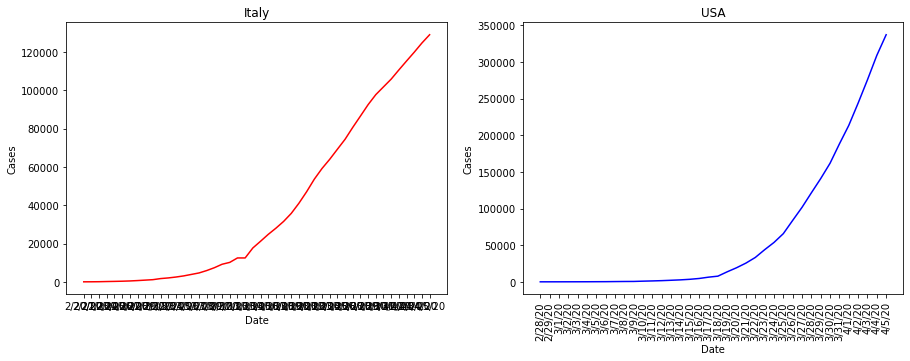

In [46]:
# use 
fig,ax = plt.subplots(1,2,figsize=(15,5)) # or whatever dimensions you like

ax[0].plot(data_italy.index,data_italy.values,color='r')
ax[0].set_title('Italy')
ax[1].plot(data_us.index,data_us.values,color='b')
ax[1].set_title('USA')

for a in ax:
    a.set_xlabel('Date')
    a.set_ylabel('Cases')
    plt.xticks(rotation=90)

## 2b: Plot Italy and US data in the same plot

Use the same colors as above, and include a legend

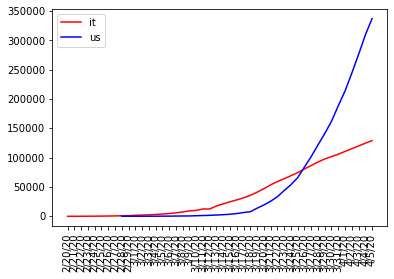

In [51]:
# your code here
plt.plot(data_italy.index,data_italy.values,color='r')
plt.plot(data_us.index,data_us.values,color='b')
plt.xticks(rotation=90)
plt.legend(['it','us'])
plt.show()

## 2c Plot Italy and US data on log axis

Note that we only want the y-axis to be logarithmic

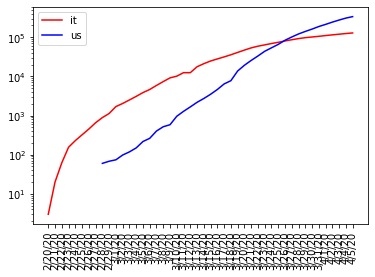

In [52]:
# your code here
plt.plot(data_italy.index,data_italy.values,color='r')
plt.plot(data_us.index,data_us.values,color='b')
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(['it','us'])
plt.show()

## 2d Make the same plot as above, but using a `for` loop

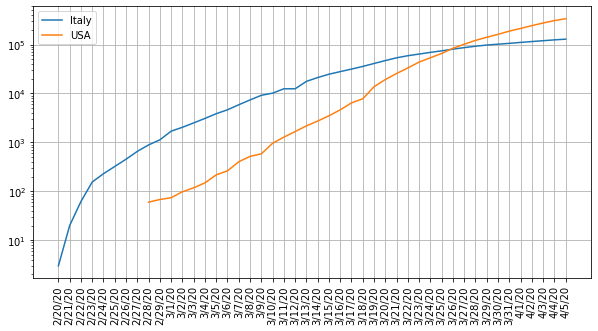

In [67]:
# your code here
data = [data_italy,data_us]
countries = ['Italy', 'USA']

fig,ax = plt.subplots(1,1,figsize=(10,5))

for d,c in zip(data,countries):
    ax.plot(d.index,d.values,label=c)

plt.xticks(rotation=90)
plt.yscale('log')
ax.legend()

## Part 3 Plot Data for 5 countries

Use a for loop, and include x/y labels and a legend. Also save your figure as a jpg and share with friends. You are now a Python datascientist

In [ ]:

# save your figure
# fig.savefig('myplot.jpg')

## Bonus: Seaborn

Plot whatever you like using seaborn